### Functional Classification and Sequence Homology Across Primate Genomes
**Emily M. Liau**

#### Introduction

The divergence of human (Homo sapiens) and chimpanzee (Pan troglodytes) ancestors dates back to at least 6.5-7.5 million years ago. Due to their homology, humans and chimpanzees share a large number of conserved sequences. Although recent technologies have improved, it remains difficult to quantify the exact differences between human and chimpanzee genomes based on protein-coding sequences alone. Therefore, comparing the major structural and regulatory genetic alterations that have shaped the biological function of specific DNA sequences could provide insight into human and chimpanzee speciation over time.

In this analysis, our objective is to classify DNA sequences across primate genomes based on their apparent biological function. More specifically, we will analyze DNA sequences from humans and chimpanzees, and attempt to classify these sequences into seven main gene families: 
- **G-protein Coupled Receptors:** membrane proteins used by eukaryotic cells to convert extracellular signals into intracellular responses, such as responses to hormones, neurotransmitters, and external signals
- **Tyrosine Kinase:** enzymes that catalyze the phosphorylation of specific tyrosine residues in target proteins
- **Tyrosine Phosphatase:** enzymes that utilize ATP to regulate signal transduction pathways by catalyzing the dephosphorylation of tyrosine-phosphorylated proteins to reverse the phosphorylation of tyrosine residues
- **Synthetase:** enzymes that catalyze the linking of two molecules using the energy derived from the separation of a pyrophosphate group from a triphosphate
- **Synthase:** enzymes that catalyze the synthesis of new compounds in the body, regardless of energy source
- **Ion Channel:** integral membrane proteins in mammaliam cells that form pores to allow the transport of specific ions by passive diffusion
- **Transcription Factor:** proteins involved in the process of transcribing DNA into RNA

The original dataset contains sequences from both human and chimpanzee genomes, as well as class values that correspond to the functions of the sequences. DNA sequence data is usually stored in FASTA file format, which is a text-based format used to represent nucleotide sequences or amino acid sequences. In FASTA files, nucleotides or amino acids are represented using single-letter codes. Therefore, sequencing data is text-based data, and it is best to use algorithms such as Naive Bayes, in order to perform classification on the DNA sequences.

In this analysis, we apply a Multinomial Naive Bayes Classifier to predict the gene family that characterizes each sequence across both primate species. Comparing the resulting classifications across both primate species of interest will provide an additional perspective into the impact of evolution on sequence homology between humans and chimpanzees over time.

#### Environment Set-Up

In [1]:
# import requisite packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# function to output bold text
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#### Gene Classes of Interest

0: G-protein Coupled Receptors  
1: Tyrosine Kinase  
2: Tyrosine Phosphatase  
3: Synthetase  
4: Synthase  
5: Ion Channel  
6: Transcription Factor 

#### DNA Sequences & Gene Classes in Humans

In [2]:
# import human DNA sequences and corresponding class values
humanDF = pd.read_table('human.txt')
printmd("**DNA Sequences & Gene Classes in Humans**\n")
print(humanDF)
print('\n')

**DNA Sequences & Gene Classes in Humans**


                                               sequence  class
0     ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1     ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4     ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3
...                                                 ...    ...
4375  ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...      0
4376  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4377  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4378  ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...      6
4379  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6

[4380 rows x 2 columns]




#### Visualizing Sequence Classification Counts in Humans

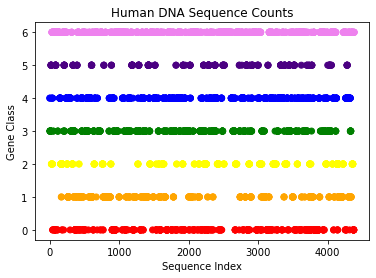

In [3]:
x = list(range(1, len(humanDF) + 1))
y = humanDF['class']
colors = ['black'] * len(y)
for i in range(len(y)):
    if (y[i] == 0):
        colors[i] = 'red'
    elif (y[i] == 1):
        colors[i] = 'orange'
    elif (y[i] == 2):
        colors[i] = 'yellow'
    elif (y[i] == 3):
        colors[i] = 'green'
    elif (y[i] == 4):
        colors[i] = 'blue'
    elif (y[i] == 5):
        colors[i] = 'indigo'
    elif (y[i] == 6):
        colors[i] = 'violet'        
plt.scatter(x, y, c = colors)
plt.xlabel('Sequence Index')
plt.ylabel('Gene Class')
plt.title('Human DNA Sequence Counts')
plt.show()

Based on the visualization above, we can observe the frequencies of sequence classification counts in humans across the 7 gene classes of interest. As we can interpret from the visualization, humans have less DNA sequences classified into ion channels as opposed to other gene classes, and that transcription factors have the greatest frequency across all gene classes.

#### Sequence Classification in Humans

In [4]:
humanFrequencies = humanDF.groupby('class').count()
gene_family = ['G-protein Coupled Receptors', 'Tyrosine Kinase', 'Tyrosine Phosphatase', 'Synthetase', 'Synthase', 'Ion Channel', 'Transcription Factor']
humanFrequencies.insert(0, "gene family", gene_family)
humanFrequencies = humanFrequencies.rename(columns = {'sequence':'count'})
printmd('**Observed Counts of Gene Families in Humans**\n')
with pd.option_context('display.max_colwidth', None):
    print(humanFrequencies)

**Observed Counts of Gene Families in Humans**


                       gene family  count
class                                    
0      G-protein Coupled Receptors    531
1                  Tyrosine Kinase    534
2             Tyrosine Phosphatase    349
3                       Synthetase    672
4                         Synthase    711
5                      Ion Channel    240
6             Transcription Factor   1343


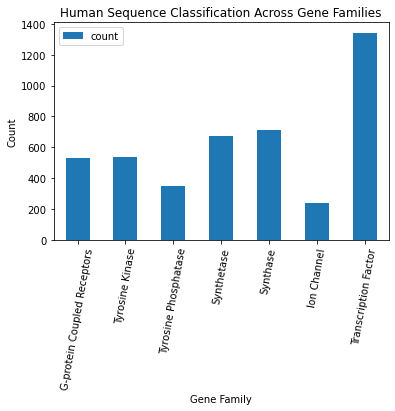

In [5]:
humanFrequencies.plot.bar(x = 'gene family', logy = False)
plt.xticks(rotation = 80)
plt.xlabel('Gene Family')
plt.ylabel('Count')
plt.title('Human Sequence Classification Across Gene Families')
plt.show()

Overall, the results in the human dataframes are consistent with the prevalence of certain biological pathways present in humans. For example, we can conclude based on the dataframe above, that the proportion of human DNA sequences that code for transcription factors outweighs the proportions present in other categories of gene families. We should expect that transcription factors are more prevalent compared to other categories of gene families, since they are the primary components responsible for regulating gene expression and producing functional protein products in eukaryotes. In addition, gene families such as G-protein coupled receptors (GPCRs) and synthetases are required in a fairly broad range of human biological pathways compared with less prevalent gene families such as tyrosine phosphatases. For example, tyrosine phosphatases are primarily utilized in physiological pathways, whereas GPCRs are used in a wider variety of processes in the human body, including those related to vision, olfaction, and the central nervous system. Therefore, the counts presented in the dataframe parallel the true frequencies that would be observed in biological pathways in humans.

#### DNA Sequences & Gene Classes in Chimpanzees

In [6]:
chimpDF = pd.read_table('chimp.txt')
printmd("**DNA Sequences & Gene Classes in Chimpanzees**\n")
print(chimpDF)
print('\n')

**DNA Sequences & Gene Classes in Chimpanzees**


                                               sequence  class
0     ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...      4
1     ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...      4
2     ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...      4
3     ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...      4
4     ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...      6
...                                                 ...    ...
1677  ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...      5
1678  ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...      5
1679  ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...      6
1680  ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...      3
1681  ATGTTGCCCAGCTGTGGCAAGATCTTGACTGGGTGTAAGAATATGC...      3

[1682 rows x 2 columns]




#### Visualizing Sequence Classification Counts in Chimpanzees

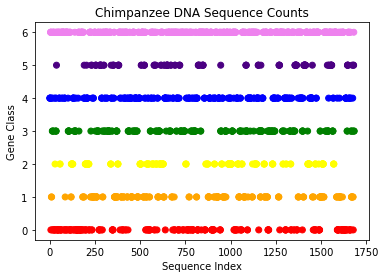

In [7]:
x = list(range(1, len(chimpDF) + 1))
y = chimpDF['class']
colors = ['black'] * len(y)
for i in range(len(y)):
    if (y[i] == 0):
        colors[i] = 'red'
    elif (y[i] == 1):
        colors[i] = 'orange'
    elif (y[i] == 2):
        colors[i] = 'yellow'
    elif (y[i] == 3):
        colors[i] = 'green'
    elif (y[i] == 4):
        colors[i] = 'blue'
    elif (y[i] == 5):
        colors[i] = 'indigo'
    elif (y[i] == 6):
        colors[i] = 'violet'        
plt.scatter(x, y, c = colors)
plt.xlabel('Sequence Index')
plt.ylabel('Gene Class')
plt.title('Chimpanzee DNA Sequence Counts')
plt.show()

Based on the visualization above, we can understand the frequencies of sequence classification counts in chimpanzees. As we can interpret from the visualization, chimpanzees have less sequences classified into both tyrosine phosphatases and ion channels as opposed to other gene classes. If we compare this visualization to that of humans, we can observe a difference in the distribution and frequency of classification counts across both species.

#### Sequence Classification in Chimpanzees

In [8]:
chimpFrequencies = chimpDF.groupby('class').count()
gene_family = ['G-protein Coupled Receptors', 'Tyrosine Kinase', 'Tyrosine Phosphatase', 'Synthetase', 'Synthase', 'Ion Channel', 'Transcription Factor']
chimpFrequencies.insert(0, "gene family", gene_family)
chimpFrequencies = chimpFrequencies.rename(columns = {'sequence':'count'})
printmd('**Observed Counts of Gene Families in Chimpanzees**\n')
with pd.option_context('display.max_colwidth', None):
    print(chimpFrequencies)

**Observed Counts of Gene Families in Chimpanzees**


                       gene family  count
class                                    
0      G-protein Coupled Receptors    234
1                  Tyrosine Kinase    185
2             Tyrosine Phosphatase    144
3                       Synthetase    228
4                         Synthase    261
5                      Ion Channel    109
6             Transcription Factor    521


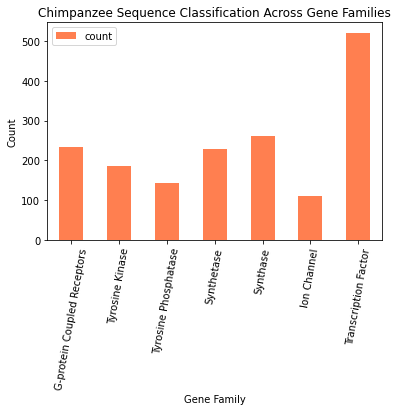

In [9]:
chimpFrequencies.plot.bar(x = 'gene family', logy = False, color = 'coral')
plt.xticks(rotation = 80)
plt.xlabel('Gene Family')
plt.ylabel('Count')
plt.title('Chimpanzee Sequence Classification Across Gene Families')
plt.show()

Similar to the human data presented above, the results in the chimpanzee dataframes are consistent with the prevalence of certain biological pathways present in chimpanzees. Akin to the proportions of gene families observed in humans, ion channels appear to have the lowest frequency and transcription factors appear to have the highest frequency across all gene families in chimpanzees. We can conclude that the results presented in the chimpanzee dataframe parallel the relative proportions observed in humans, likely due to the prevalence of conserved sequences in both species across evolutionary time. In addition, transcription factors serve as a potential source of variability in gene expression between humans and chimpanzees. Since transcription factors are evolutionarily stable and structurally well-conserved, specific transription factors could be responsible for driving major changes between both primate species of interest, which serves as an explanation as to why transcription factors are the most prevalent gene family in both datasets. Overall, we can conclude that the counts presented in the dataframe parallel the true frequencies that would be observed in biological pathways in chimpanzees.

#### Comparing Proportions of Gene Families Across Humans and Chimpanzees

In [10]:
# merge human and chimpanzee dataframes
combined = pd.merge(humanFrequencies, chimpFrequencies, on = 'gene family')
combined = combined.rename(columns = {'count_x':'human', 'count_y':'chimp'})

# convert gene family counts into relative proportions
for index, row in combined.iterrows():
    combined['human'] = combined['human'] / combined['human'].sum()
    combined['chimp'] = combined['chimp'] / combined['chimp'].sum()
printmd('**Proportions of Gene Families in Humans & Chimpanzees**\n')
print(combined)

**Proportions of Gene Families in Humans & Chimpanzees**


                   gene family     human     chimp
0  G-protein Coupled Receptors  0.121233  0.139120
1              Tyrosine Kinase  0.121918  0.109988
2         Tyrosine Phosphatase  0.079680  0.085612
3                   Synthetase  0.153425  0.135553
4                     Synthase  0.162329  0.155172
5                  Ion Channel  0.054795  0.064804
6         Transcription Factor  0.306621  0.309750


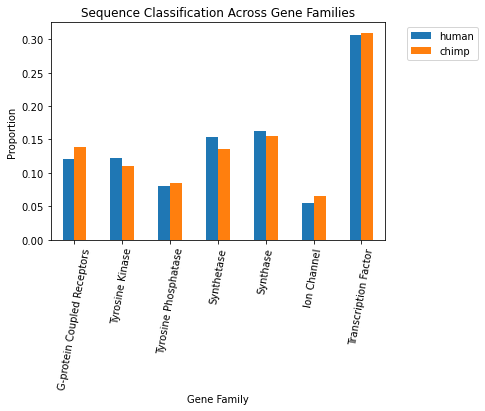

In [11]:
# create grouped bar chart to visualize relative proportions of gene family classifications
combined.plot.bar(x = 'gene family', logy = False)
plt.xticks(rotation = 80)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Gene Family')
plt.ylabel('Proportion')
plt.title('Sequence Classification Across Gene Families')
plt.show()

As presented in the merged dataframe and the grouped bar chart visualization above, the relative proportions of sequences that correspond to each gene family are fairly similar across the human and chimpanzee genomes, due to sequence conservation over evolutionary history. We should expect such results, since humans and chimpanzees share 98.8% of their DNA, as a product of their descent from a relatively recent common ancestor.

#### Curating the k-mer Library

Since DNA sequences provide instructions to encode proteins and other essential molecules within organisms, we use k-mer counting to account for all potential open reading frames (ORFs) within each sequence. In this analysis, we use k-mers of size 6, since this size increases the chance that all possible k-mers will overlap within sequence assembly, while also minimizing information loss.

In [12]:
# define kmers function to split DNA sequences into hexamers
def kmers(sequence, size = 6):
    return [sequence[x: x + size].lower() for x in range(len(sequence) - size + 1)]

In [13]:
# split human DNA sequences into hexamers
humanDF['hexamers'] = humanDF.apply(lambda x: kmers(x['sequence']), axis = 1)
humanDF = humanDF.drop('sequence', axis = 1)
printmd("**Hexamers & Gene Classes in Humans**")
print(humanDF)

**Hexamers & Gene Classes in Humans**

      class                                           hexamers
0         4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1         4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2         3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
3         3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
4         3  [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...
...     ...                                                ...
4375      0  [atggaa, tggaag, ggaaga, gaagat, aagatt, agatt...
4376      6  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...
4377      6  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...
4378      6  [atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc...
4379      6  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...

[4380 rows x 2 columns]


In [14]:
# split chimpanzee DNA sequences into hexamers
chimpDF['hexamers'] = chimpDF.apply(lambda x: kmers(x['sequence']), axis = 1)
chimpDF = chimpDF.drop('sequence', axis = 1)
printmd("**Hexamers & Gene Classes in Chimpanzees**")
print(chimpDF)

**Hexamers & Gene Classes in Chimpanzees**

      class                                           hexamers
0         4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1         4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2         4  [atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...
3         4  [atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...
4         6  [atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg...
...     ...                                                ...
1677      5  [atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg...
1678      5  [atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg...
1679      6  [atgaag, tgaagc, gaagcg, aagcga, agcgac, gcgac...
1680      3  [atgact, tgactg, gactgg, actgga, ctggaa, tggaa...
1681      3  [atgttg, tgttgc, gttgcc, ttgccc, tgccca, gccca...

[1682 rows x 2 columns]


In [15]:
# convert human hexamers into a list of string sentences, which serves as input for CountVectorizer
human_texts = list(humanDF['hexamers'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
    
# store human class labels separately
human_class_labels = humanDF.iloc[:, 0].values
printmd('**Human Class Labels**\n')
print(human_class_labels)
printmd('**Human Hexamers**\n')
print(human_texts[0])

**Human Class Labels**


[4 4 3 ... 6 6 6]


**Human Hexamers**


atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [16]:
# convert chimpanzee hexamers into a list of string sentences, which serves as input for CountVectorizer
chimp_texts = list(chimpDF['hexamers'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
    
# store chimpanzee class labels separately
chimp_class_labels = chimpDF.iloc[:, 0].values
printmd('**Chimpanzee Class Labels**\n')
print(chimp_class_labels)
printmd('**Chimpanzee Hexamers**\n')
print(chimp_texts[0])

**Chimpanzee Class Labels**


[4 4 4 ... 6 3 3]


**Chimpanzee Hexamers**


atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatacc ataccg taccgc accgcc ccgccg cgccgt gccgta ccgtat cgtatg gtatga tatgac atgacc tgaccc gaccca acccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctg tcctga cctgac ctgaca tgacac gacact acacta cactat actatt ctattt tatttc atttct tttctc ttctcg tctcgt ctcgtc tcgtca cgtcac gtcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaat taaatt aaattc aattca attcaa ttcaaa tcaaat caaatt aaatta aattac attacc ttacca taccat accatc ccatct catcta atctac tctacc ctaccc tacccc accccc cccccc ccccct cccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaaa caaaac aaaacc aaaccc aaccca acccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaac aaaact aaacta aactac actaca ctacaa tacaat acaata caataa aataaa ataaac

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# create a bag-of-words model
cv = CountVectorizer(ngram_range = (4, 4))

# apply CountVectorizer with n-gram value of 4 to transform text into vector based on word frequency
x_human = cv.fit_transform(human_texts)
x_chimp = cv.transform(chimp_texts)

#### Classification

In order to classify the sequences into their respective gene families, we apply a Multinomial Naive Bayes Classifier, a method suitable for classification on datasets with discrete features. This approach predicts the tag of a certain text using the Bayes Theorem; by calculating each class' likelihood for a given sample, the Multinomial Naive Bayes Classifier will determine the tag with the greatest predicted probability. In this analysis, the tag corresponds to the gene family, and the input text consists of the hexamer sequences.

In [18]:
# define get_metrics function to retrieve accuracy, precision, recall, and F1 values from classifier
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average = 'weighted')
    recall = recall_score(y_test, y_predicted, average = 'weighted')
    f1 = f1_score(y_test, y_predicted, average = 'weighted')
    return accuracy, precision, recall, f1

#### Human Multinomial Naive Bayes Classifier

In [19]:
from sklearn.model_selection import train_test_split

# 80-20 train-test split
x_human_train, x_human_test, y_human_train, y_human_test = train_test_split(x_human, human_class_labels, test_size = 0.20, random_state = 42)

# apply Multinomial Naive Bayes classifier on datasets with alpha = 0.1
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(x_human_train, y_human_train)
y_human_pred = classifier.predict(x_human_test)

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# construct confusion matrix
printmd("**Human Confusion Matrix & Assessment Values**\n")
print(pd.crosstab(pd.Series(y_human_test, name = 'Observed'), pd.Series(y_human_pred, name = 'Expected')))

# output accuracy, precision, recall, and F1 values
accuracy, precision, recall, f1 = get_metrics(y_human_test, y_human_pred)
print("\nAccuracy = %.3f \nPrecision = %.3f \nRecall = %.3f \nF1 = %.3f" % (accuracy, precision, recall, f1))

**Human Confusion Matrix & Assessment Values**


Expected   0    1   2    3    4   5    6
Observed                                
0         99    0   0    0    1   0    2
1          0  104   0    0    0   0    2
2          0    0  78    0    0   0    0
3          0    0   0  124    0   0    1
4          1    0   0    0  143   0    5
5          0    0   0    0    0  51    0
6          1    0   0    1    0   0  263

Accuracy = 0.984 
Precision = 0.984 
Recall = 0.984 
F1 = 0.984


#### Visualizing the Human Confusion Matrix

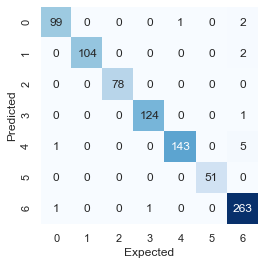

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(y_human_pred, y_human_test)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
plt.xlabel('Expected')
plt.ylabel('Predicted');

From the output above, we can conclude that the accuracy of our Multinomial Naive Bayes Classifier on the human sequences is approximately 98.4% on the testing set. Based on our confusion matrix, we can conclude that our classifier accurately predicts the gene families present in humans based on sequences alone. However, in cases where class = 6 (transcription factor), the classifier is not always able to accurately characterize sequences that function as transcription factors.

#### Chimpanzee Multinomial Naive Bayes Classifier

In [22]:
from sklearn.model_selection import train_test_split

# 80-20 train-test split
x_chimp_train, x_chimp_test, y_chimp_train, y_chimp_test = train_test_split(x_chimp, chimp_class_labels, test_size = 0.20, random_state = 42)

# apply Multinomial Naive Bayes classifier on datasets with alpha = 0.1
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(x_chimp_train, y_chimp_train)
y_chimp_pred = classifier.predict(x_chimp_test)

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# construct confusion matrix
printmd("**Chimpanzee Confusion Matrix & Assessment Values**\n")
print(pd.crosstab(pd.Series(y_chimp_test, name = 'Observed'), pd.Series(y_chimp_pred, name = 'Expected')))

# output accuracy, precision, recall, and F1 values
accuracy, precision, recall, f1 = get_metrics(y_chimp_test, y_chimp_pred)
print("\nAccuracy = %.3f \nPrecision = %.3f \nRecall = %.3f \nF1 = %.3f" % (accuracy, precision, recall, f1))

**Chimpanzee Confusion Matrix & Assessment Values**


Expected   0   1   2   3   4   5    6
Observed                             
0         27   0   0   0   0   0    1
1          0  38   0   0   0   0    1
2          0   0  25   0   0   0    2
3          0   0   0  41   0   0    2
4          2   1   0   3  40   0    6
5          3   0   0   0   3  19    4
6          0   0   0   1   0   0  118

Accuracy = 0.914 
Precision = 0.920 
Recall = 0.914 
F1 = 0.911


#### Visualizing the Chimpanzee Confusion Matrix

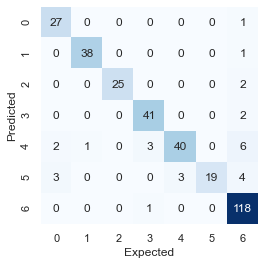

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(y_chimp_pred, y_chimp_test)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
plt.xlabel('Expected')
plt.ylabel('Predicted');

From the output above, we can conclude that the accuracy of our Multinomial Naive Bayes Classifier on the chimpanzee sequences is approximately 91.4% on the testing set. Based on our confusion matrix, we can conclude that our classifier accurately predicts the gene families present in chimpanzees based on sequences alone. However, in cases where class = 6 (transcription factor), the classifier is not always able to accurately characterize sequences that function as transcription factors.

#### Conclusion & Discussion

As a result of our analysis, we can conclude that our Multinomial Naive Bayes Classifiers for both the human and chimpanzee datasets are able to accurately predict biological function from DNA sequences alone. We did not consider the effect of outliers within the original dataset of DNA sequences, however, in order to identify outliers, it is possible to perform multiple sequence alignment or input a distance matrix, and examine the average distance of each DNA sequence to the remaining sequences in the dataset. Average distances would be found using the interquartile range of the distribution. If certain DNA sequences do not fall within the determined range, they would be considered outliers, and ideally would be removed from the dataset prior to performing machine learning. Although we did not identify or remove outliers from the original dataset, both the human and chimpanzee classifiers appear to maintain a fairly high accuracy on testing sets.

With regards to specific insight this analysis provides, we can conclude that the majority of DNA sequences across human and chimpanzee genomes are highly conserved, which is due to their evolutionary homology and shared common ancestor. Therefore, it is expected that both species share a similar ratio of DNA sequences that correspond to the seven gene classes of interest in this analysis.

Applying the results from this analysis towards other studies would allow us to assess sequence homology across the human and chimpanzee genomes from the time of descent from their common ancestor. Doing so would allow us to better understand how evolution has played a role in altering gene function and regulation in both species. In the future, more extensive analysis on additional gene families, or on other regions of the genome, such as non-coding regions or mitochondrial DNA, could provide greater insight into the evolutionary changes that have shaped the divergence of humans and chimpanzees over time. In addition, we could also make evolutionary comparisons between a broader range of species in order to further verify that the Multinomial Naive Bayes Classifier is best suited for datasets consisting of DNA sequences.